In [341]:
% matplotlib inline

In [342]:
import pysal
import numpy as np
import matplotlib.pylab as plt

In [343]:
img = np.load("img.npy")

In [344]:
img= img[:, 10000:11000]

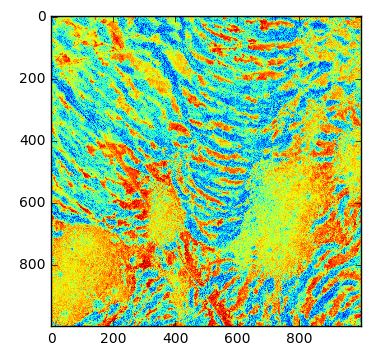

In [345]:
plt.imshow(img)

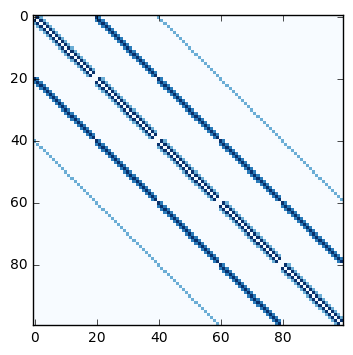

In [346]:
nx = 20
x,y = np.indices((nx,nx))
x.shape = (nx**2, 1)
y.shape = (nx**2, 1)
data = np.hstack([x, y])
w = pysal.threshold_continuousW_from_array(data, 2, alpha = -1,)
plt.imshow(w.full()[0][:100, :100], cmap = 'Blues', interpolation='none')

In [347]:
kw = pysal.Kernel(data, fixed = False,function = 'gaussian')
mi = pysal.Moran(img[:nx, :nx], w,  two_tailed=False)
print mi.I
print mi.EI
print mi.EI_sim
print mi.p_sim


0.723017408112
-0.00250626566416
-0.00235214408885
0.001


In [348]:
dweights = []
kweights = []

for i in range(1, 11):
    w = pysal.threshold_continuousW_from_array(data, i, alpha = -.5)
    mi = pysal.Moran(img[:nx, :nx], w,  two_tailed=False)
    dweights.append(mi.I)    
#     kw = pysal.Kernel(data, fixed = False,function = 'gaussian')    
    kw = pysal.Kernel(data, bandwidth=i)    
    mi = pysal.Moran(img[:nx, :nx], kw,  two_tailed=False)
    kweights.append(mi.I)
        

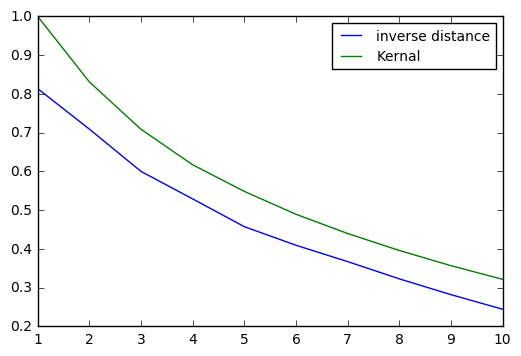

In [349]:
plt.plot(range(1, 11), dweights, label = 'inverse distance')
plt.plot(range(1, 11), kweights, label =  'Kernal')
plt.legend(loc = 'best', fontsize = 10)

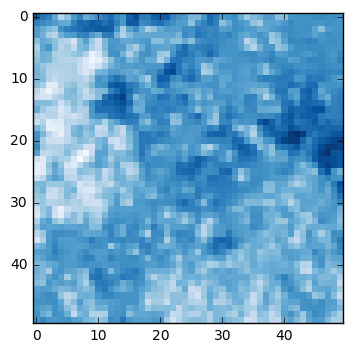

In [350]:
nx = 50
x,y=np.indices((nx,nx))
x.shape=(nx**2,1)
y.shape=(nx**2,1)
data=np.hstack([x,y])
kw = pysal.Kernel(data, fixed = False, function = 'gaussian')


plt.imshow(img[:nx, :nx], interpolation = 'none',  cmap = 'Blues')

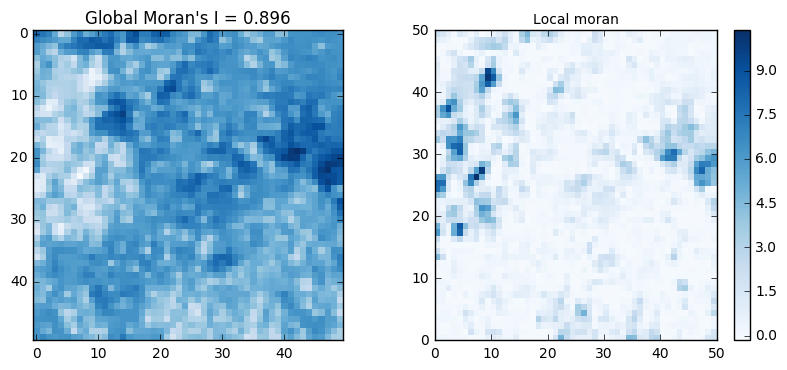

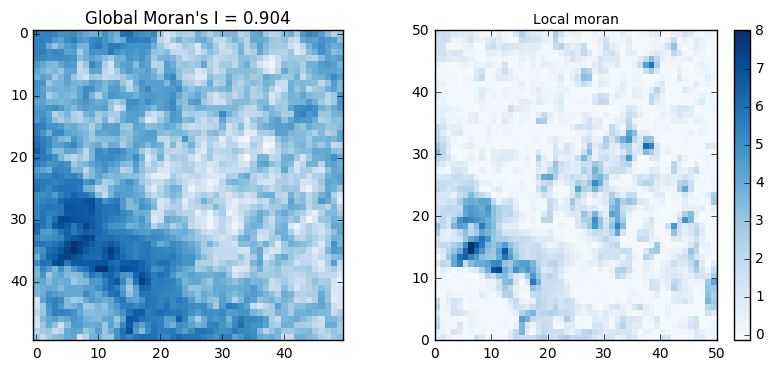

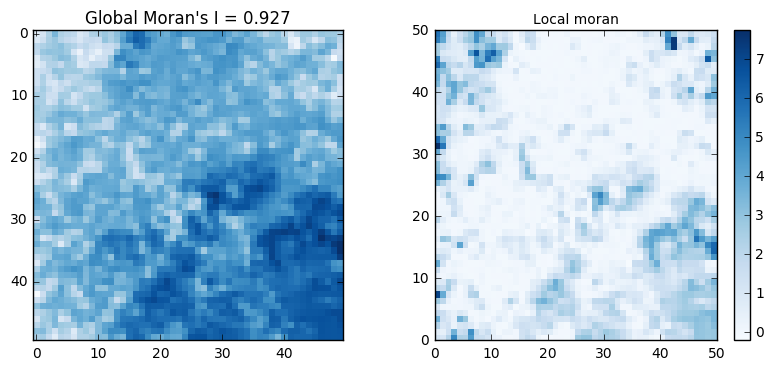

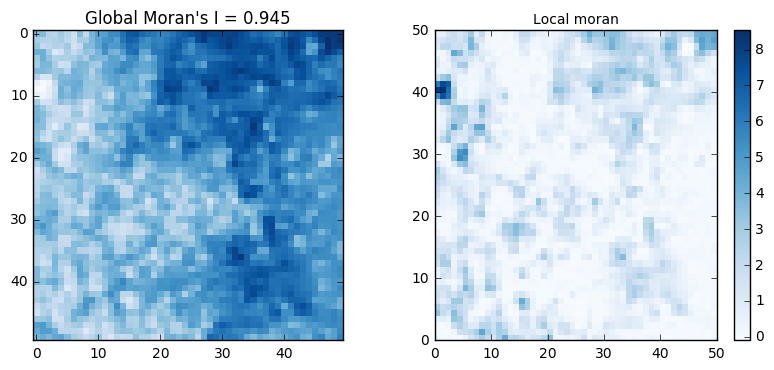

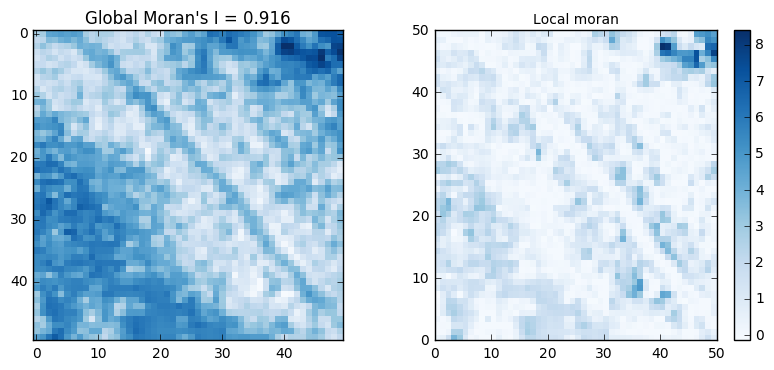

In [351]:

for i in range(5):
    fig = plt.figure(i, figsize = (10, 4))
    z = img[i*nx:(i+1)*nx, :nx]
    mi = pysal.Moran(z, kw,  two_tailed=False)
    
    ax = plt.subplot(121)
    plt.imshow(z, interpolation = 'none',  cmap = 'Blues')
    plt.title("Global Moran's I = %.3f"%mi.I)

    
    ax = plt.subplot(122)
    lm = pysal.Moran_Local(z,kw)
    plt.title('Local moran', fontsize = 10)
    plt.pcolor(np.flipud(lm.Is.reshape((nx,nx))), cmap = 'Blues')
    plt.colorbar()
    plt.savefig("figures/MoranI-%.3f.pdf"%mi.I)